In [100]:
# Load tools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

from scipy import stats
from scipy.stats import norm
from scipy.stats import randint as sp_randint

import warnings
warnings.filterwarnings('ignore')

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.decomposition import PCA

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier

# np.random.seed(42)

# 分析报告

## 查看训练数据集

In [2]:
# input data
df = pd.read_csv('pfm_train.csv')
print(df.shape)
df.head()

(1100, 31)


,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,37,0,Travel_Rarely,Research & Development,1,4,Life Sciences,77,1,Male,...,3,80,1,7,2,4,7,5,0,7
1,54,0,Travel_Frequently,Research & Development,1,4,Life Sciences,1245,4,Female,...,1,80,1,33,2,1,5,4,1,4
2,34,1,Travel_Frequently,Research & Development,7,3,Life Sciences,147,1,Male,...,4,80,0,9,3,3,9,7,0,6
3,39,0,Travel_Rarely,Research & Development,1,1,Life Sciences,1026,4,Female,...,3,80,1,21,3,3,21,6,11,8
4,28,1,Travel_Frequently,Research & Development,1,3,Medical,1111,1,Male,...,1,80,2,1,2,3,1,0,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1100 non-null   int64 
 1   Attrition                 1100 non-null   int64 
 2   BusinessTravel            1100 non-null   object
 3   Department                1100 non-null   object
 4   DistanceFromHome          1100 non-null   int64 
 5   Education                 1100 non-null   int64 
 6   EducationField            1100 non-null   object
 7   EmployeeNumber            1100 non-null   int64 
 8   EnvironmentSatisfaction   1100 non-null   int64 
 9   Gender                    1100 non-null   object
 10  JobInvolvement            1100 non-null   int64 
 11  JobLevel                  1100 non-null   int64 
 12  JobRole                   1100 non-null   object
 13  JobSatisfaction           1100 non-null   int64 
 14  MaritalStatus           

In [4]:
df.isna().sum()
# 训练数据集中不存在缺失值，不需要进行缺失值的处理

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

## 描述性统计

### 数值型变量描述性统计

In [5]:
# 数值型变量的描述性统计
df.describe().T

# 'StandardHours'方差为0，没有变化，对影响因素分析和模型训练都没有帮助，后续删除

,count,mean,std,min,25%,50%,75%,max
Age,1100.0,36.999091,9.037230,18.0,30.00,36.0,43.0,60.0
Attrition,1100.0,0.161818,0.368451,0.0,0.00,0.0,0.0,1.0
DistanceFromHome,1100.0,9.427273,8.196694,1.0,2.00,7.0,15.0,29.0
Education,1100.0,2.922727,1.022242,1.0,2.00,3.0,4.0,5.0
EmployeeNumber,1100.0,1028.157273,598.915204,1.0,504.25,1026.5,1556.5,2065.0
EnvironmentSatisfaction,1100.0,2.725455,1.098053,1.0,2.00,3.0,4.0,4.0
JobInvolvement,1100.0,2.730909,0.706366,1.0,2.00,3.0,3.0,4.0
JobLevel,1100.0,2.054545,1.107805,1.0,1.00,2.0,3.0,5.0
JobSatisfaction,1100.0,2.732727,1.109731,1.0,2.00,3.0,4.0,4.0
MonthlyIncome,1100.0,6483.620909,4715.293419,1009.0,2924.50,4857.0,8354.5,19999.0


### 类别型变量描述性统计

In [6]:
# 类别型变量的描述性统计
df.describe(exclude='number').T

# 'Over18'全部为'Y'， 没有变化，对影响因素分析和模型训练都没有帮助，后续删除

,count,unique,top,freq
BusinessTravel,1100,3,Travel_Rarely,787
Department,1100,3,Research & Development,727
EducationField,1100,6,Life Sciences,462
Gender,1100,2,Male,653
JobRole,1100,9,Sales Executive,247
MaritalStatus,1100,3,Married,500
Over18,1100,1,Y,1100
OverTime,1100,2,No,794


In [7]:
# 查看标签的分布
df['Attrition'].value_counts(normalize=True)

# 可以看出训练数据集中有16,18%的员工流失，83.82%的员工没有流失。
# 数据存在一定的不平衡问题，不利于模型的预测，之后在模型训练阶段可以通过向上重采样解决数据不平衡的问题

0    0.838182
1    0.161818
Name: Attrition, dtype: float64

<AxesSubplot:xlabel='Attrition', ylabel='count'>

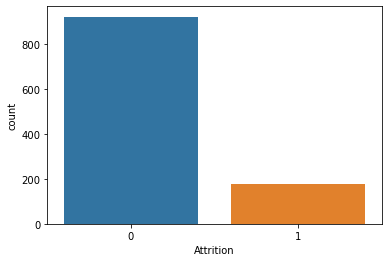

In [8]:
# 可视化标签的分布
sns.countplot(x = df['Attrition'])

## 初步处理

删除以下三个特征防止对模型的干扰：
- 删除'Over18'，因为'Age'已经反映了员工年龄。'Over18'并不能提供更多的信息。同时在描述性统计中也可以看到，员工的年龄都是超过18岁的。
- 删除'StandardHours'，因为在描述性统计中可以看到，'StandardHours'全部为80，不同员工之间没有区别，这不会对员工的流失造成影响。
- 删除'EmployeeNumber'，因为员工编号与员工的特征没有直接的联系，也不会对员工流失造成影响。

In [9]:
del df['Over18']
del df['StandardHours']
del df['EmployeeNumber']

## 数据可视化

### 类别型数据可视化

In [10]:
# 筛选出类别型变量
columns_cat = ['BusinessTravel', 'Department', 'EducationField','Gender', 'JobRole', 'MaritalStatus', 'OverTime']

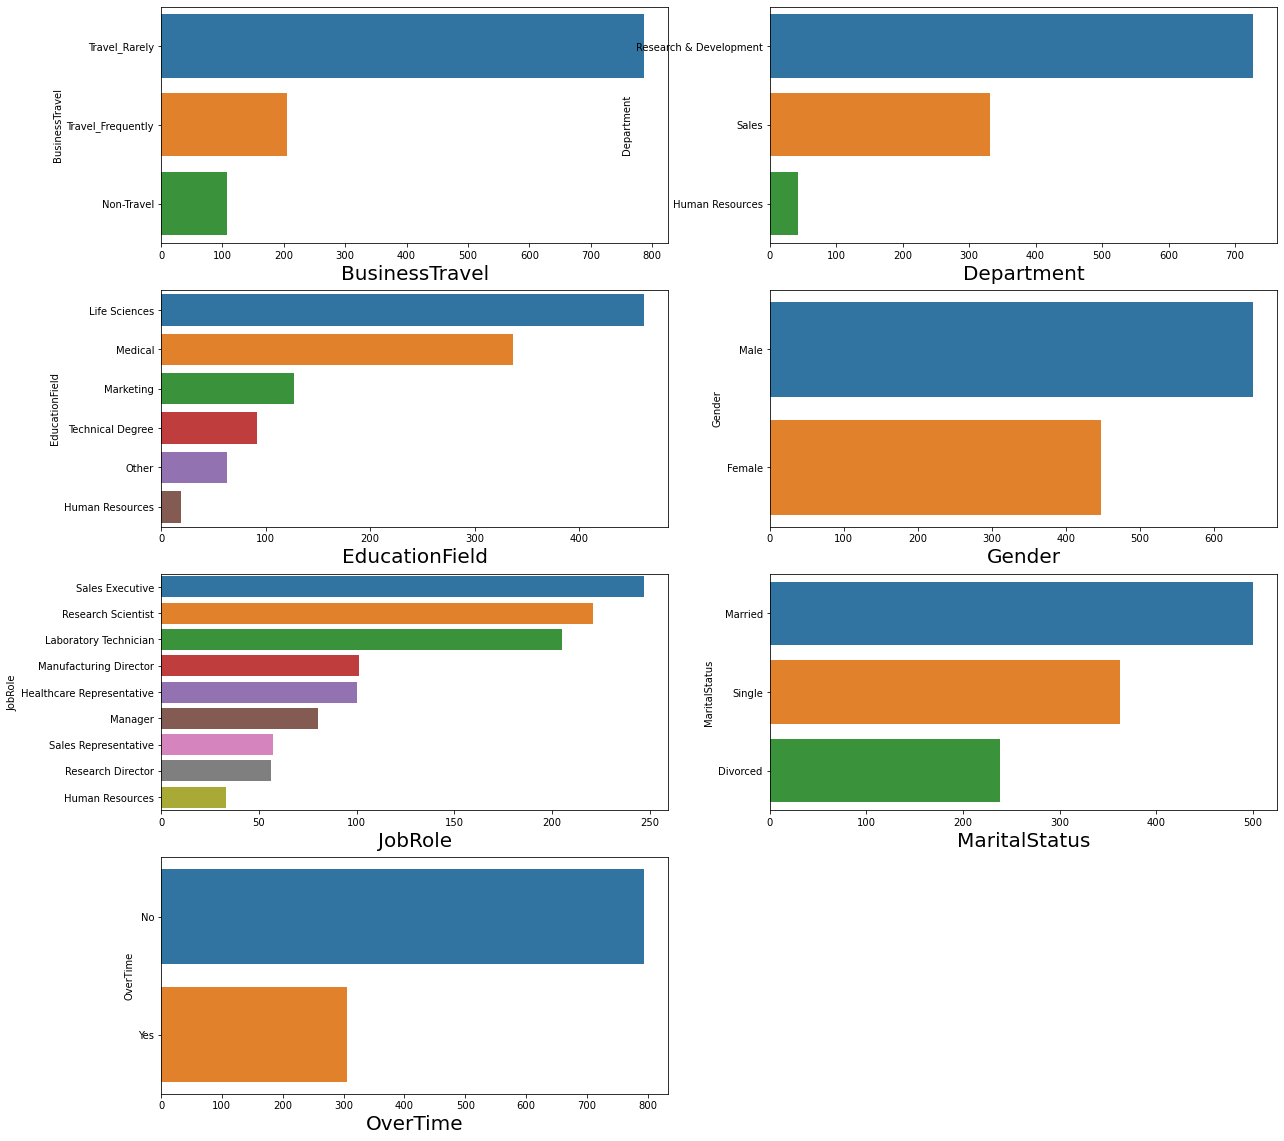

In [74]:
# 查看每个类别型变量员工的分布
fig = plt.figure(figsize=(20,20))
for i in range(len(columns_cat)):
    plt.subplot(4,2,i+1)
    sns.countplot(y=df[columns_cat[i]], order = df[columns_cat[i]].value_counts().index)
    plt.xlabel(columns_cat[i], fontsize=20)

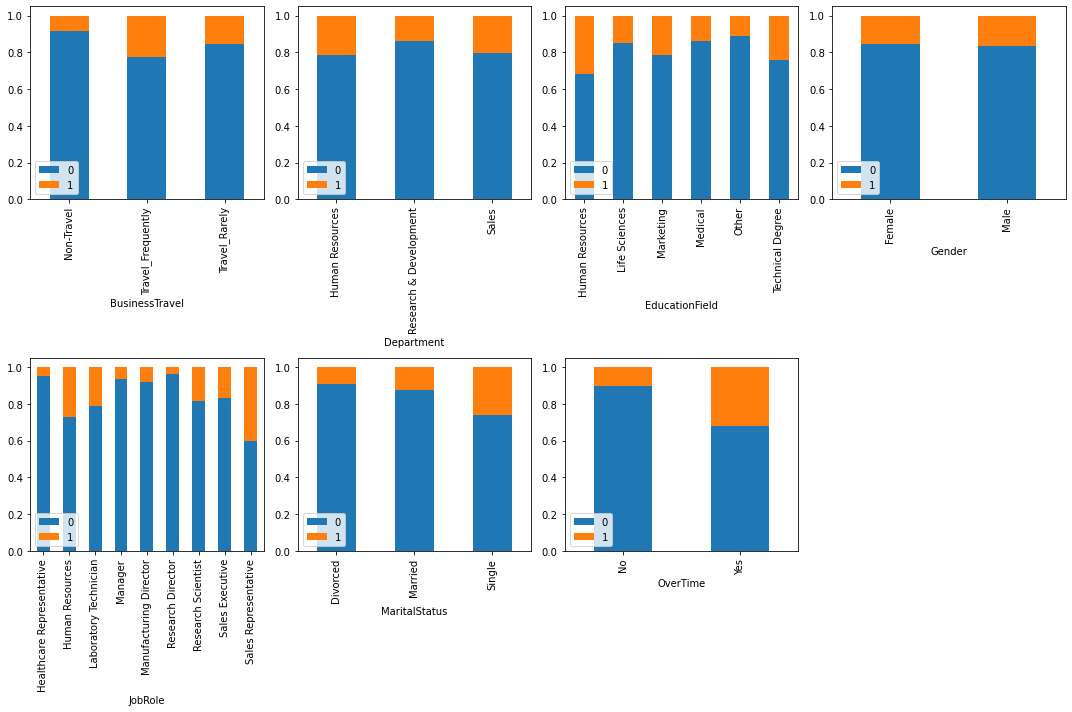

In [11]:
# 查看每个类别型变量中，流失与否的员工数占比
def stacked_barcharts(columns, ncols=4):
    nrows = 1 + (len(columns) - 1) // ncols
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, nrows * 5))
    for i, column in enumerate(columns):
        # calculate pivot table
        pivot = pd.crosstab(df['Attrition'], df[column])
        # divide by column sums to get frequency per column
        freq = pivot.div(pivot.sum())
        # display as stacked bar chart with 100%
        ax = axes[i // 4, i % 4] if nrows > 1 else axes[i]
        with warnings.catch_warnings():
            warnings.simplefilter("ignore")
            freq.transpose().plot(kind='bar', ax=ax, stacked=True, legend=False)
            ax.legend(loc = 'lower left')
    for i in range(len(columns), nrows * 4):
        ax = axes[i // 4, i % 4] if nrows > 1 else axes[i]
        fig.delaxes(ax)
    plt.tight_layout()

stacked_barcharts(columns_cat)

根据上图可以看出，除'Gender'以外，其他变量都与流失与否有关。
- 'BusinessTravel'中，不出差的员工流失率最低，符合预期。
- 'Department'中，研发部流失率最低。
- 'EducationField'中，员工学习领域也与流失率有关，学习人力资源的员工更容易流失。
- 'JobRole'中，销售代表流失率最高，研究总监流失率最低。
- 'MaritalStatus'中，单身的员工更容易流失，符合预期。
- 'OverTime'中，经常加班的员工更容易流失，符合预期。

### 数值型数据可视化

In [12]:
# 筛选出数值型变量
columns_num = ['Age',  'DistanceFromHome','Education','EnvironmentSatisfaction', 
           'JobInvolvement', 'JobLevel', 'JobSatisfaction',  'MonthlyIncome','NumCompaniesWorked',  
           'PercentSalaryHike','PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',
            'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 
            'YearsWithCurrManager']

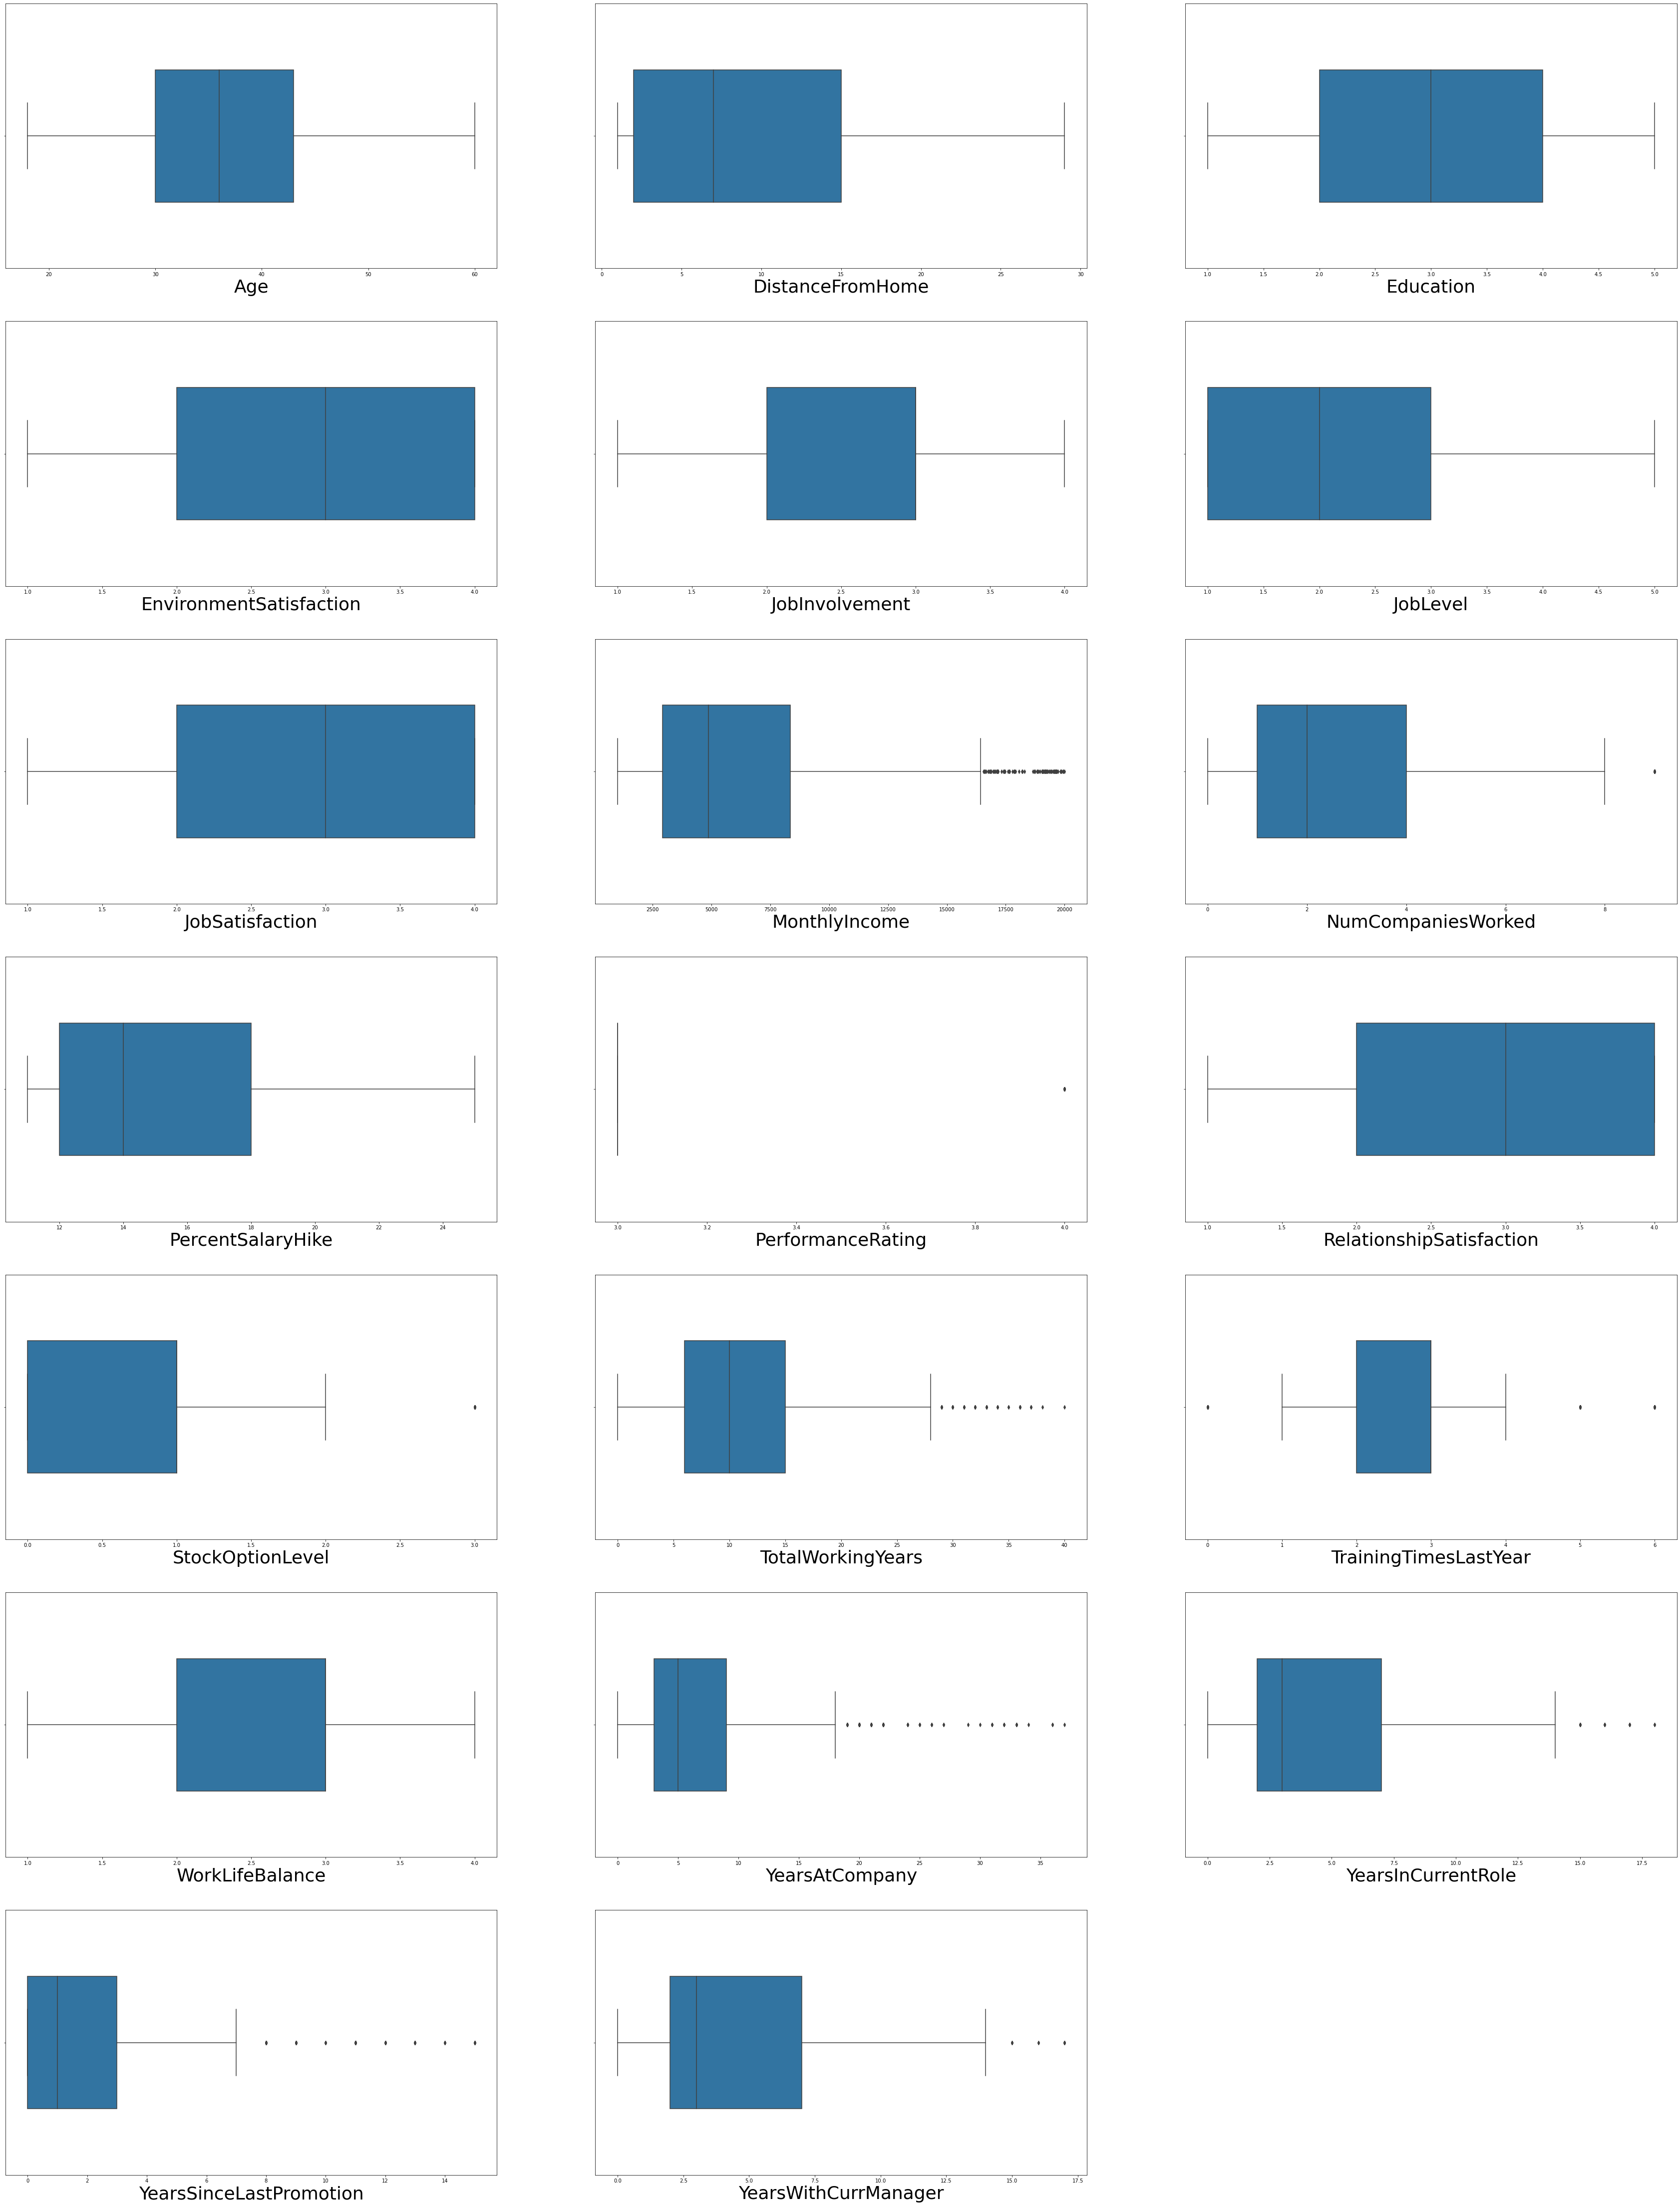

In [33]:
# 查看每个数值型变量的员工分布
fig = plt.figure(figsize=(60,80))
for i in range(len(columns_num)):
    plt.subplot(7,3,i+1)
    sns.boxplot(df[columns_num[i]], orient='v', width=0.5)
    plt.xlabel(columns_num[i], fontsize=36)

'PerformanceRating'的箱线图有些异常，查看原数据后发现，数值全为'3'和'4'，可以排出异常

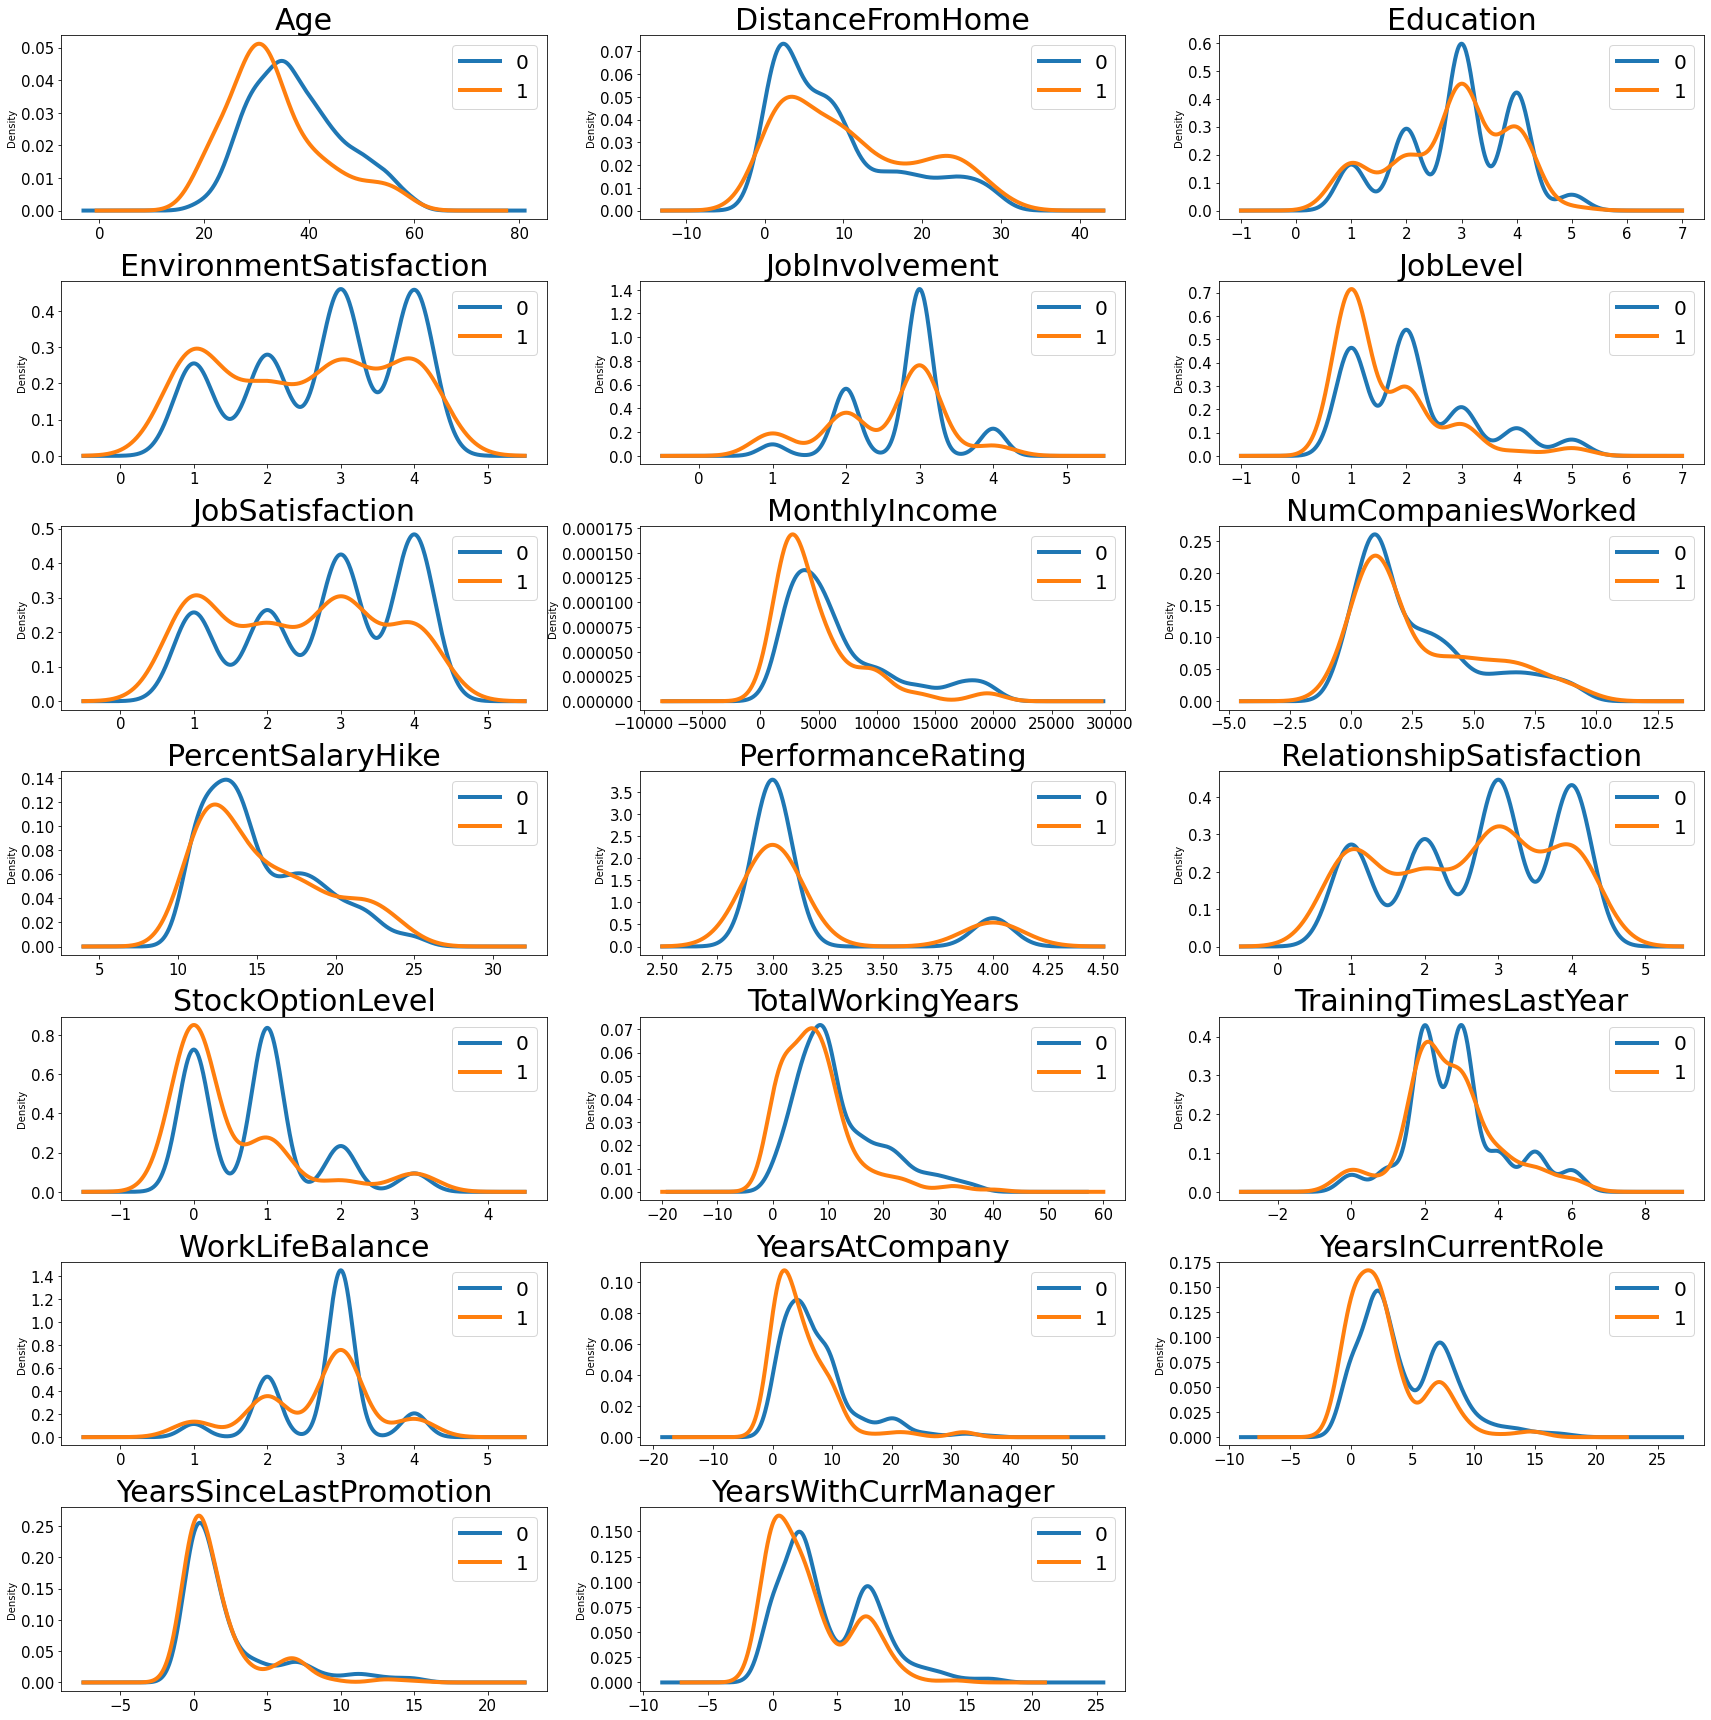

In [13]:
# 按流失与否，看每个数值型变量的分布
ncols = 3
nrows = 1 + (len(columns_num) - 1) // ncols
fig, axes = plt.subplots(nrows, ncols, figsize=(24,24))
for i, column in enumerate(columns_num):    
    for response, group in df[['Attrition', column]].groupby('Attrition'):        
        group[column].plot.density(ax = axes[i//3,i%3],linewidth = 4,fontsize=15,label = response)
        axes[i//3,i%3].legend(loc = 'best',fontsize = 20)
    axes[i//3,i%3].set_title(column,size=30) 
for i in range(len(columns_num), nrows * 3):
    ax = axes[i // 3, i % 3] if nrows > 1 else axes[i]
    fig.delaxes(ax)

plt.tight_layout()

根据上图，除'YearsSinceLastPromotion'， 'TrainingTimesLastYear'外，其他变量都与流失率有一定关系，其中农比较明显的有：
- 'Age'中，60岁之前，越年轻的人越容易离职。
- 'YearsAtCompany'中，工作时间越短越容易离职，在公司工作30年以后，流失率基本无差别。
- 'EnviromentSatisfaction'，'JobInvolvement'，'JobLevel', 'JobSatisfaction'，'RelationshipSatisfaction '等越低越容易流失，越高越不容易流失。这些变量，‘Attrition’为1时更集中在左边。

### 相关性热力图

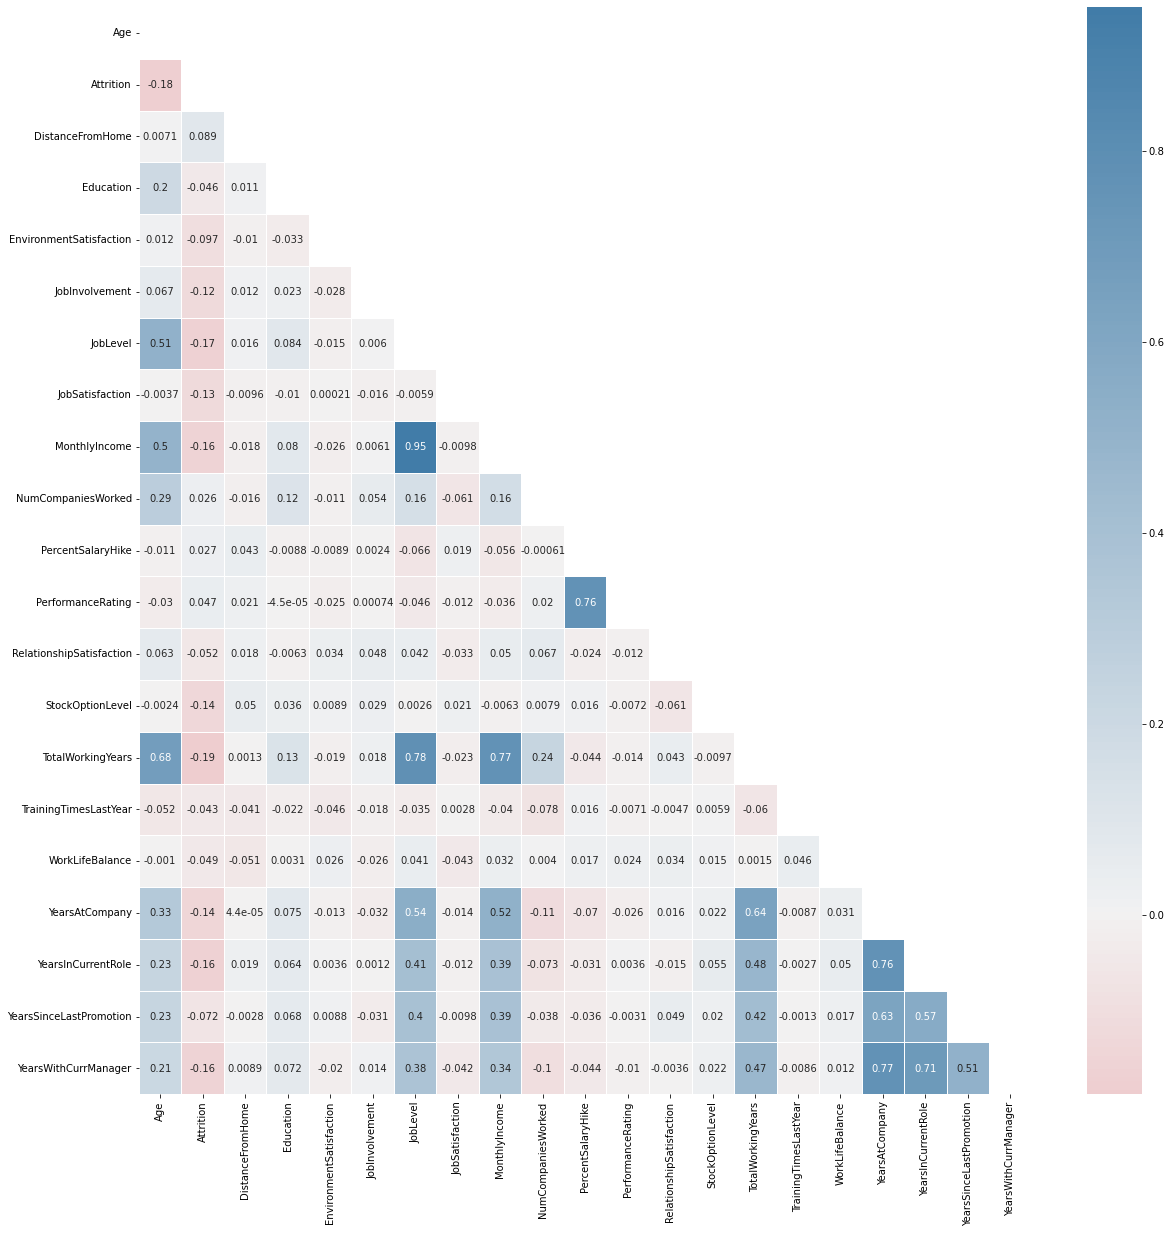

In [14]:
plt.figure(figsize=(20, 20))
cmap = sns.diverging_palette(h_neg=10,h_pos=240,as_cmap=True)
matrix = np.triu(df.corr())
sns.heatmap(df.corr(), annot=True,center=0, linewidth=.8, mask=matrix, cmap=cmap);

# 预测模型

## 导入数据
统一导入训练集和测试集，因为第一部分分析报告已经对训练集的数据进行了探索，因此之后仅对测试集数据进行探索。

In [64]:
df_train = pd.read_csv('pfm_train.csv')
df_test = pd.read_csv('pfm_test.csv')

In [65]:
df_test.head()

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,40,Non-Travel,Research & Development,9,4,Other,1449,3,Male,3,...,3,80,2,11,2,4,8,7,0,7
1,53,Travel_Rarely,Research & Development,7,2,Medical,1201,4,Female,3,...,2,80,1,26,6,3,7,7,4,7
2,42,Travel_Rarely,Research & Development,2,4,Other,477,1,Male,2,...,2,80,0,14,6,3,1,0,0,0
3,34,Travel_Frequently,Human Resources,11,3,Life Sciences,1289,3,Male,2,...,4,80,2,14,5,4,10,9,1,8
4,32,Travel_Rarely,Research & Development,1,1,Life Sciences,134,4,Male,3,...,4,80,0,1,2,3,1,0,0,0


In [66]:
# 测试集并不存在缺失值，无须处理
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       350 non-null    int64 
 1   BusinessTravel            350 non-null    object
 2   Department                350 non-null    object
 3   DistanceFromHome          350 non-null    int64 
 4   Education                 350 non-null    int64 
 5   EducationField            350 non-null    object
 6   EmployeeNumber            350 non-null    int64 
 7   EnvironmentSatisfaction   350 non-null    int64 
 8   Gender                    350 non-null    object
 9   JobInvolvement            350 non-null    int64 
 10  JobLevel                  350 non-null    int64 
 11  JobRole                   350 non-null    object
 12  JobSatisfaction           350 non-null    int64 
 13  MaritalStatus             350 non-null    object
 14  MonthlyIncome             

## 重抽样
由于训练集数据中存在不平衡的问题，即仅有16,18%的员工流失，83.82%的员工没有流失。因此需要对训练集进行重新抽样。因为训练集的数据并不多，因此采用向上抽样的方法，在流失员工的样本中多次抽样，使训练集中流失与没有流失的员工数量相同。

In [86]:
count0, count1 = df_train['Attrition'].value_counts()
class0 = df_train[df_train['Attrition']==0]
class1 = df_train[df_train['Attrition']==1]
print(count0)
print(count1)

922
178


922


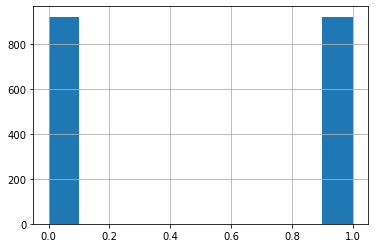

In [87]:
over1 = class1.sample(count0,replace=True) # 向上采样
df_train = pd.concat([class0,over1],axis=0)  # 合并训练集
print(len(over1))
plt.hist(df_train['Attrition'])
plt.grid()

# 现在训练集已经平衡了

## 特征工程

In [89]:
# 根据第一部分的数据探索删除列
df_train.drop(columns=['Over18','StandardHours','EmployeeNumber'], inplace=True)
df_test.drop(columns=['Over18','StandardHours','EmployeeNumber'], inplace=True)

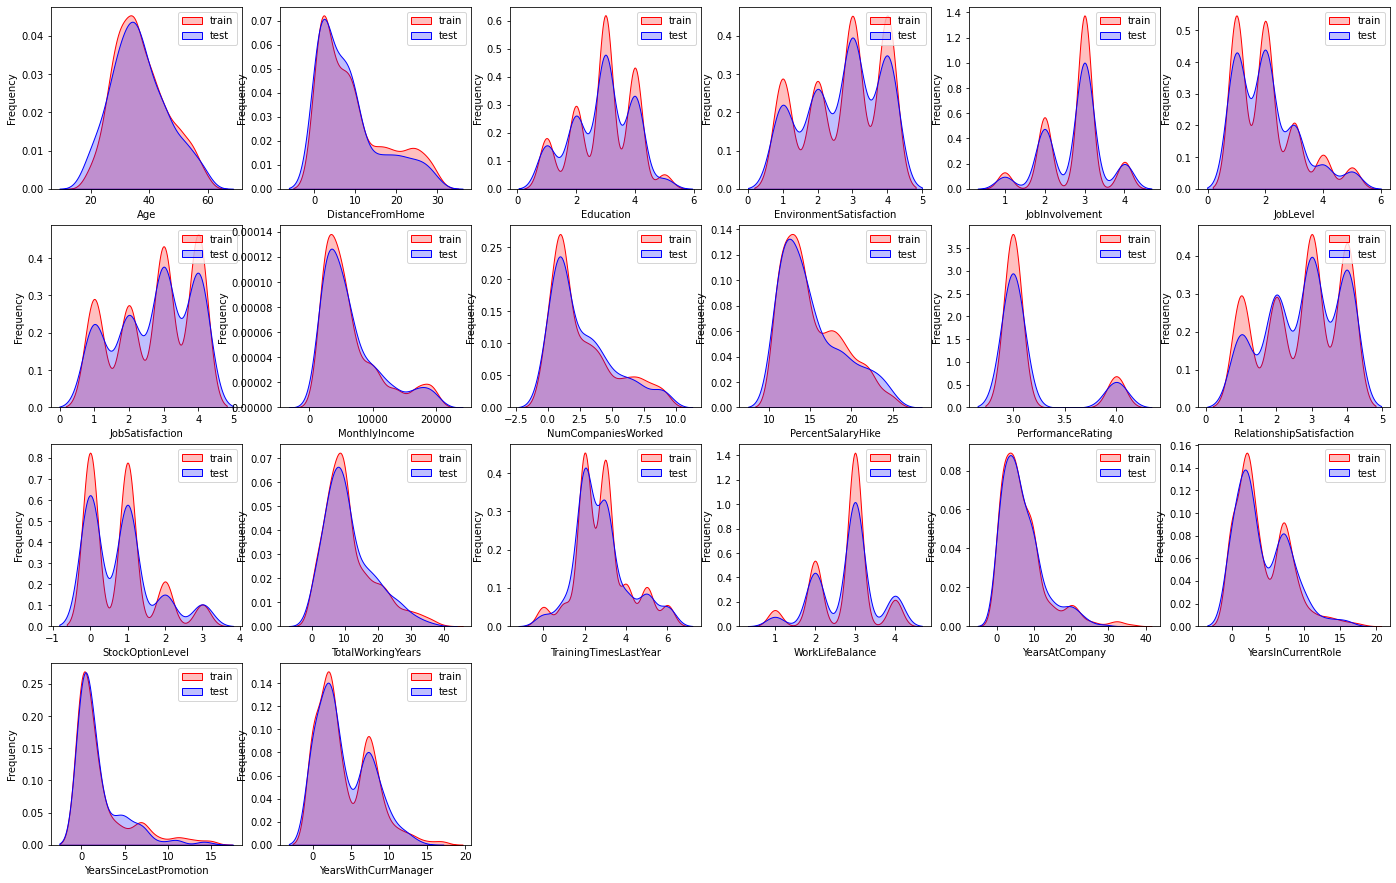

In [69]:
# 对比训练集与测试集的变量分布
dist_cols = 6
dist_rows = len(df_test.columns)
plt.figure(figsize=(4*dist_cols,4*dist_rows))

i=1
for col in columns_num:
    ax=plt.subplot(dist_rows,dist_cols,i)
    ax = sns.kdeplot(df_train[col], color="Red", shade=True)
    ax = sns.kdeplot(df_test[col], color="Blue", shade=True)
    ax.set_xlabel(col)
    ax.set_ylabel("Frequency")
    ax = ax.legend(["train","test"])
    
    i+=1
plt.show()

由上图可得，训练集与测试集的数值类变量分布类似，模型的泛化能力强

In [98]:
# 定义训练集与测试集
X_train = df_train.drop(columns=['Attrition'])
y_train = df_train['Attrition']
X_test = df_test

In [99]:
# 处理0-1类别型变量
X_train['Male'] = X_train['Gender'].map({'Female':0,'Male':1})
del X_train['Gender']
X_train['OverTime'] = X_train['OverTime'].map({'No':0,'Yes':1})

X_test['Male'] = X_test['Gender'].map({'Female':0,'Male':1})
del X_test['Gender']
X_test['OverTime'] = X_test['OverTime'].map({'No':0,'Yes':1})

In [101]:
# 处理其他类别型变量
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

In [102]:
# 对数据进行缩放
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [103]:
# 由于特征过多，因此对数据进行降维
pca = PCA(n_components=10)
pca.fit(X_train)
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

## 模型选择
- 采用随机森林（Random Forest）、支持向量机（Support Vector Machine）和随机梯度提升（Stochastic Gradient Boosting）三种分类方法来进行拟合。
- 采用RandomizedSearch和GridSearch的方法来进行最优参数的选择。
- 利用shufflesplit的方法计算mean test score。

In [104]:
nmc      = 50
testSize = 0.25

### Random Forest

In [105]:
def RandomForest(X,y,nmc,testSize):
    fullmodel = Pipeline(steps=[("scaler", MinMaxScaler()),
                                ("RF", RandomForestClassifier(random_state=42))
                               ])
    
    # use randomsearch to search the best parameters
    max_depth    = sp_randint(1, 11)
    max_features = sp_randint(1, 11)
    n_estimators = sp_randint(1,100)
    
    param_random = {'RF__max_depth':max_depth,'RF__max_features':max_features,'RF__n_estimators':n_estimators}
    shuffle      = ShuffleSplit(n_splits = nmc, test_size = testSize)

    # set the random search
    random_search = RandomizedSearchCV(fullmodel,param_random,cv=shuffle,return_train_score=True)

    # implement search
    random_search.fit(X,y)
    # move results into DataFrame
    results = pd.DataFrame(random_search.cv_results_)[['rank_test_score','mean_train_score','mean_test_score','param_RF__max_depth','param_RF__max_features','param_RF__n_estimators']]

    # set the best random forest model
    best_forest = random_search.best_estimator_
    return results,best_forest


In [109]:
resultRF,bestRF = RandomForest(X_train,y_train,nmc,testSize)
bestRF.fit(X_train,y_train)
print(resultRF)
print(bestRF)

   rank_test_score  mean_train_score  mean_test_score param_RF__max_depth  \
0                1          0.997007         0.939219                  10   
1                2          0.993724         0.933406                   9   
2                6          0.905568         0.833753                   7   
3                3          0.970007         0.900390                   7   
4                5          0.930499         0.860390                   6   
5               10          0.709530         0.685033                   1   
6                8          0.777281         0.738915                   3   
7                9          0.720405         0.694794                   2   
8                4          0.960839         0.890325                   7   
9                7          0.899262         0.831757                   6   

  param_RF__max_features param_RF__n_estimators  
0                      5                     60  
1                      6                     68  
2 

根据rank_test_score可以判断，最大mean_test_score为0.939219。

### Support Vector Machine

In [120]:
def svc(X,y,nmc,testSize):
    fullModel = Pipeline([("scaler", MinMaxScaler()),
                          ("nonlinsv", SVC(tol=0.001,random_state=42))
                         ])

    # set up dictionary for grid search
    param_grid = {'nonlinsv__C':[1, 10, 50, 100, 200, 500, 1000],
                  'nonlinsv__gamma':[1, 10, 50, 100, 200, 500, 1000],
                  'nonlinsv__kernel':['rbf']}
    # set up cross-validation shuffles
    shuffle_split = ShuffleSplit(test_size=testSize, n_splits=nmc)
    # set up search
    grid_search = GridSearchCV(fullModel,param_grid,cv=shuffle_split, return_train_score=True,n_jobs=-1)
    # implement search
    grid_search.fit(X,y)
    # move results into DataFrame
    results  = pd.DataFrame(grid_search.cv_results_)[['rank_test_score','mean_train_score','mean_test_score','param_nonlinsv__C','param_nonlinsv__gamma']]
    best_svc = grid_search.best_estimator_
    return results,best_svc

In [121]:
# get best model
resultSVC,bestSVC = svc(X_train,y_train,nmc,testSize)
bestSVC.fit(X_train,y_train)
print(resultSVC)
print(bestSVC)

    rank_test_score  mean_train_score  mean_test_score param_nonlinsv__C  \
0                49          0.774620         0.747939                 1   
1                44          0.930282         0.870629                 1   
2                35          0.986696         0.947202                 1   
3                28          0.997440         0.973406                 1   
4                21          0.999841         0.986334                 1   
5                 1          1.000000         0.991063                 1   
6                 1          1.000000         0.991063                 1   
7                48          0.846392         0.793579                10   
8                41          0.987477         0.921866                10   
9                29          1.000000         0.960868                10   
10               22          1.000000         0.976963                10   
11               15          1.000000         0.987158                10   
12          

根据rank_test_score可以判断，最大mean_test_score为0.991063。

### Stochastic Gradient Boosting

In [112]:
def xgbc(X,y,nmc,testSize):
    # using pipeline to combine several steps 
    fullmodel = Pipeline([("scaler", MinMaxScaler()),
                          ("GBC", GradientBoostingClassifier(validation_fraction=0.2,n_iter_no_change=10,
                                                             tol=0.001,random_state=42))
                          ])
    # setting parameter to search
    param_grid = {'GBC__n_estimators':[100],'GBC__max_depth':[1,2,3],
                  'GBC__max_features':[3,6,9],
                  'GBC__learning_rate':[0.0001, 0.001, 0.01, 0.1, 0.2, 0.3]}
    
    shuffle = ShuffleSplit(n_splits = nmc, test_size = testSize)

    # set up grid search
    grid_search = GridSearchCV(fullmodel,param_grid,cv = shuffle,
                              return_train_score = True,n_jobs = -1)
    grid_search.fit(X,y)
    # store result to a dataframe
    result = pd.DataFrame(grid_search.cv_results_)[['rank_test_score','mean_train_score','mean_test_score','param_GBC__max_depth','param_GBC__max_features']]
    
    # store the best mddel
    best_model  = grid_search.best_estimator_ 
    return result,best_model

In [113]:
resultGBC,bestGBC = xgbc(X_train,y_train,nmc,testSize)
bestGBC.fit(X_train,y_train)
print(resultGBC)
print(bestGBC)


    rank_test_score  mean_train_score  mean_test_score param_GBC__max_depth  \
0                52          0.524396         0.506377                    1   
1                53          0.520926         0.503124                    1   
2                53          0.520926         0.503124                    1   
3                49          0.530036         0.509371                    2   
4                50          0.528200         0.509154                    2   
5                51          0.526956         0.507245                    2   
6                46          0.536934         0.515184                    3   
7                47          0.535343         0.514143                    3   
8                48          0.532668         0.513059                    3   
9                45          0.538019         0.517397                    1   
10               44          0.599407         0.576182                    1   
11               43          0.629964         0.6170

根据rank_test_score可以判断，最大mean_test_score为0.913623。

## 模型训练与预测
比较三种方法的mean_test_score后，选择支持向量机方法的最优模型。先在全部的训练集上拟合，然后再对测试集进行预测。最后生成预测数据，并合并在原来的训练集中，输出为CSV文件。

In [122]:
best_model = Pipeline(steps=[('scaler', MinMaxScaler()),
                ('nonlinsv', SVC(C=1, gamma=500, random_state=42))])
best_model.fit(X_train, y_train) # 在全部训练集上拟合
y_test = best_model.predict(X_test) # 预测

In [127]:
y_test = pd.DataFrame(y_test, columns=['Attrition'])
df_test = pd.read_csv('pfm_test.csv')
plm_test_pred = pd.concat([df_test,y_test],axis=1)
plm_test_pred.head()

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,40,Non-Travel,Research & Development,9,4,Other,1449,3,Male,3,...,80,2,11,2,4,8,7,0,7,0
1,53,Travel_Rarely,Research & Development,7,2,Medical,1201,4,Female,3,...,80,1,26,6,3,7,7,4,7,0
2,42,Travel_Rarely,Research & Development,2,4,Other,477,1,Male,2,...,80,0,14,6,3,1,0,0,0,0
3,34,Travel_Frequently,Human Resources,11,3,Life Sciences,1289,3,Male,2,...,80,2,14,5,4,10,9,1,8,0
4,32,Travel_Rarely,Research & Development,1,1,Life Sciences,134,4,Male,3,...,80,0,1,2,3,1,0,0,0,0


In [128]:
# 输出预测结果
plm_test_pred.to_csv("plm_test_pred.csv")